### Good Turing - BiGram

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import re
import math
import pickle

In [2]:
df = pd.read_csv('Data/Unprocessed_Data/bigram.csv')
uni_gram_count = 89212
df.head()

,Bigram1,Bigram2,Count,Prob
0,[START],i,22243,0.084024
1,of,the,12665,0.179730
2,in,the,11710,0.201438
3,[START],the,10868,0.041055
4,[START],you,7071,0.026711


In [3]:
## Making Dict of count : words
uni_good = {}
for i in range(len(df)):
    if df.iloc[i][2] in uni_good:
        uni_good[df.iloc[i][2]].append((df.iloc[i][0],df.iloc[i][1]))
    else:
        uni_good[df.iloc[i][2]] = [(df.iloc[i][0],df.iloc[i][1])]

In [4]:
## Saving Data
import pickle
with open("bi_unigood_bkp.pkl", "wb") as pickle_file:
    pickle.dump(uni_good, pickle_file)

$$
\begin{align*}
\text{Good Turning Formula : }
c^* = \frac{(c+1)N_{c+1}}{N_c} 
\end{align*}
$$

In [5]:
## temp{} - c* : list of n-grams
temp = {}
for i in range(200,0,-1):
    ## i+1 == c+1
    ## len(uni_good[i+1]) = N_c+1
    ## len(uni_good[i]) = N_c
    ## c_star = c*
    c_star = (i+1)*len(uni_good[i+1])/len(uni_good[i])

    ##If count already present just add small value
    while c_star in temp:
        c_star = c_star+0.001
    temp[c_star] = uni_good[i]

##### Calculating Probabilities

In [7]:
new_count = np.sum(np.array(list(temp.keys())))

In [8]:
good_turining_count = {}

for i in temp:
    for j in temp[i]:
        good_turining_count[j] = i

## Adding rest of corpus
for i in uni_good:
    if i <= 200:
        break
    for j in uni_good[i]:
        good_turining_count[j] = i

In [11]:
## Importing Vocabulary
with open('Vocabulary.pkl','rb') as file:
    vocabulary = pickle.load(file)

In [12]:
## 0th Count
zero_count = len(uni_good[1])/((len(vocabulary)**2)-len(df))
print(zero_count)

6.228444470671075e-05


In [13]:
### Getting sum of all the counts
sum = np.sum(np.array(list(good_turining_count.values()))) + zero_count
print(sum)

3412030.05706228


In [14]:
#### Converting good_turining_count dict from count to probability
for i in good_turining_count:
    good_turining_count[i] = good_turining_count[i]/sum

good_turining_count[0] = zero_count/sum

In [15]:
print("Sum of Prob = " + str(np.sum(np.array(list(good_turining_count.values())))))

Sum of Prob = 0.9999999999999988


In [16]:
good_turining_count[-1] = len(df)

In [17]:
with open("bigram_prob.pkl", "wb") as pickle_file:
    pickle.dump(good_turining_count, pickle_file)

In [25]:
## Importing saved data since my machine crashed
with open('bigram_prob.pkl','rb') as file:
    good_turining_count = pickle.load(file)

### Testing

In [26]:
df = pd.read_csv('Data/testing_data.txt',
                 delimiter='\t',header=None, names=['Text'])
df.head()

,Text
0,"[START], woh, banda, kahan, hai, jo, kal, keh,..."
1,"[START], the, junta, will, end, up, with, a, b..."
2,"[START], that, doesn't, disprove, anything, i,..."
3,"[START], international, trade, relationships, ..."
4,"[START], hamare, pet, ki, bas, ki, bat, nhi, r..."


$$ log[PP(Perplexity)] = -\frac{1}{N} [log(P(w_2|w_1)) + ...  log(P(w_n|w_{n-1}))] $$

In [27]:
## Importing Unigram
with open('unigram_prob.pkl','rb') as file:
    unigram_probability = pickle.load(file)

In [28]:
arr_pp = []
log_sum = 0
for j in range(len(df)):
    string1 = df.iloc[j][0].split(", ")
    ## Unigram probability / First word
    log_sum += math.log(unigram_probability[string1[0]])
    ## Rest of bi gram
    for i in range(1,len(string1)):
        if (string1[i-1],string1[i]) in good_turining_count:
            if string1[i-1] in unigram_probability:
                log_sum += math.log(good_turining_count[(string1[i-1],string1[i])]) - math.log(unigram_probability[string1[i-1]])
            else:
                log_sum += math.log(good_turining_count[(string1[i-1],string1[i])]) - math.log(unigram_probability[0])
        else:
            if string1[i-1] in unigram_probability:
                log_sum += math.log(good_turining_count[0]) - math.log(unigram_probability[string1[i-1]])
            else:
                log_sum += math.log(good_turining_count[0]) - math.log(unigram_probability[0])
    log_pp = -log_sum/len(string1)
    arr_pp.append(log_pp)

In [29]:
with open("Backup/perplexity_bigram.pkl", "wb") as pickle_file:
    pickle.dump(arr_pp, pickle_file)

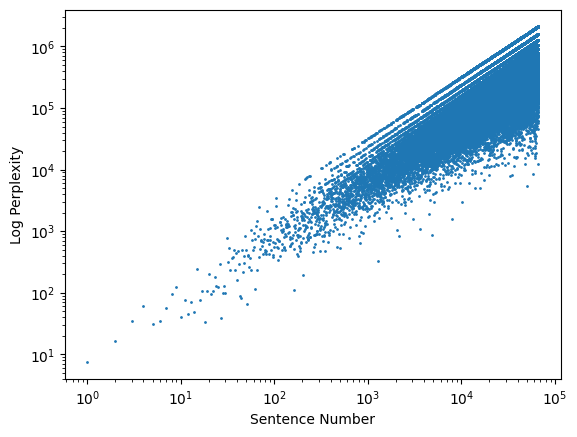

In [30]:
### PLoting the graph
x = list(range(1,len(df)+1))
plt.scatter(x,arr_pp,s=1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Sentence Number')
plt.ylabel('Log Perplexity')
plt.show()

In [31]:
## Importing Additive - 1 data
df = pd.read_csv('Data/Additive/biagram_Perplexity_with_smoothing.csv')
df.head()

,Unnamed: 0,Data,Perplexity
0,0,"[START], woh, banda, kahan, hai, jo, kal, keh,...",12561.234607
1,1,"[START], the, junta, will, end, up, with, a, b...",1150.445807
2,2,"[START], that, doesn't, disprove, anything, i,...",1411.930660
3,3,"[START], international, trade, relationships, ...",6950.642060
4,4,"[START], hamare, pet, ki, bas, ki, bat, nhi, r...",23462.025170


In [32]:
additive_pp = list(df.iloc[:-1,2])

In [33]:
len(x)

66180

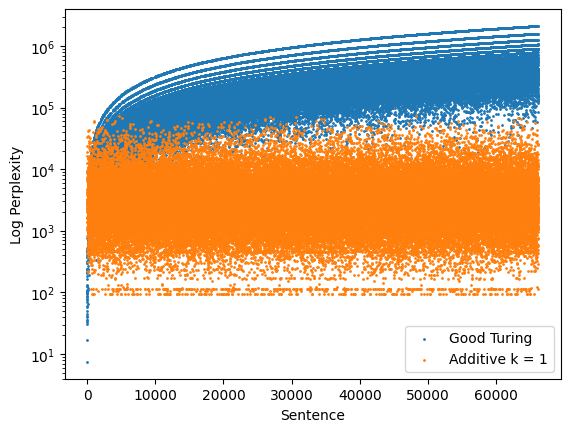

In [34]:
### PLoting the graph
x = list(range(1,len(arr_pp)+1))
plt.scatter(x,arr_pp,s=1,label='Good Turing')
plt.scatter(x,additive_pp,s=1,label = 'Additive k = 1')
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Sentence')
plt.ylabel('Log Perplexity')
plt.legend()
plt.show()

As per the above image we can see that Additive-1 smoothing is performing better than Good turing. 

But there are little data points Good Turing is performing better than Additive Smoothing.

In this case Additive smoothing is much prefered.

In [35]:
## Importing Additive - 1 data
df = pd.read_csv('Data/Additive/biagram_Perplexity_with_smoothing_additive.csv')
df.head()

,Unnamed: 0,Data,Perplexity
0,0,"[START], woh, banda, kahan, hai, jo, kal, keh,...",31888.404729
1,1,"[START], the, junta, will, end, up, with, a, b...",3002.447600
2,2,"[START], that, doesn't, disprove, anything, i,...",1960.687100
3,3,"[START], international, trade, relationships, ...",8986.075532
4,4,"[START], hamare, pet, ki, bas, ki, bat, nhi, r...",36755.479943


In [36]:
additive_pp = list(df.iloc[:-1,2])

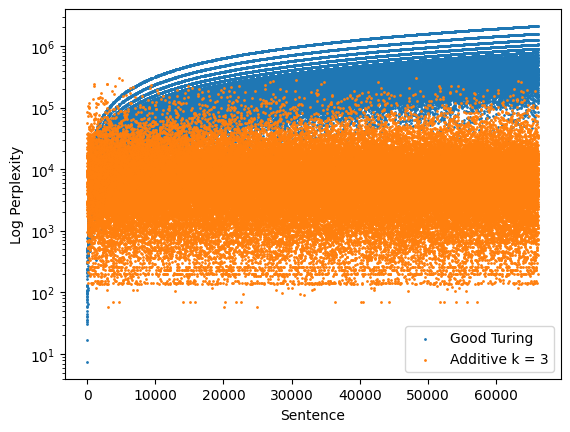

In [37]:
### PLoting the graph
x = list(range(1,len(arr_pp)+1))
plt.scatter(x,arr_pp,s=1,label='Good Turing')
plt.scatter(x,additive_pp,s=1,label = 'Additive k = 3')
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Sentence')
plt.ylabel('Log Perplexity')
plt.legend()
plt.show()